# Домашнее задание. Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/TSLA.csv')

1. Вывести все колонки из DataFrame

In [2]:
df.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

2. Посчитать среднюю цену закрытия акций Tesla, в периуд с открытия по 10.01.2012

In [3]:
df = df[:int(df.index[df["Date"]=='2012-01-10'].values)+1]
df["Open"].mean()

25.692603182989693

3. Вывести график цены закрытия 

<Axes: >

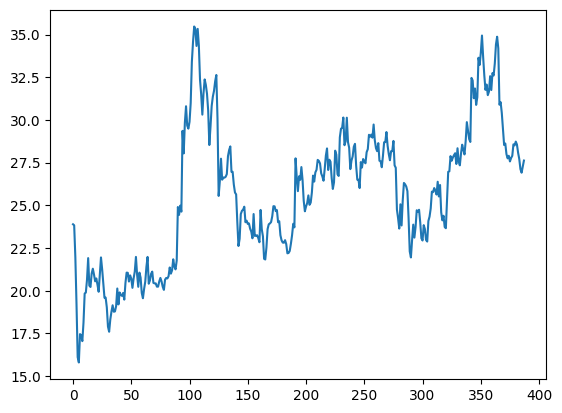

In [4]:
df["Close"].plot()

4. Нормализация 

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [5]:
x_max = df["Open"].max()
x_min = df["Open"].min()
x_norm = lambda x: (x - x_min) / (x_max - x_min)

df["Open"].apply(x_norm)

0      0.144957
1      0.489103
2      0.449062
3      0.347694
4      0.195641
         ...   
383    0.611759
384    0.588951
385    0.560568
386    0.550431
387    0.572732
Name: Open, Length: 388, dtype: float64

5. Что такое SMA (Simple Moving Average) с окном 12,15,30. 
Можно посмотреть внешние решения: 
- https://www.pythonpool.com/moving-average-python/   
- https://mrjbq7.github.io/ta-lib/

6. Построить график с ценой закрытия и посчитаным SMA 12,15,30

<Axes: >

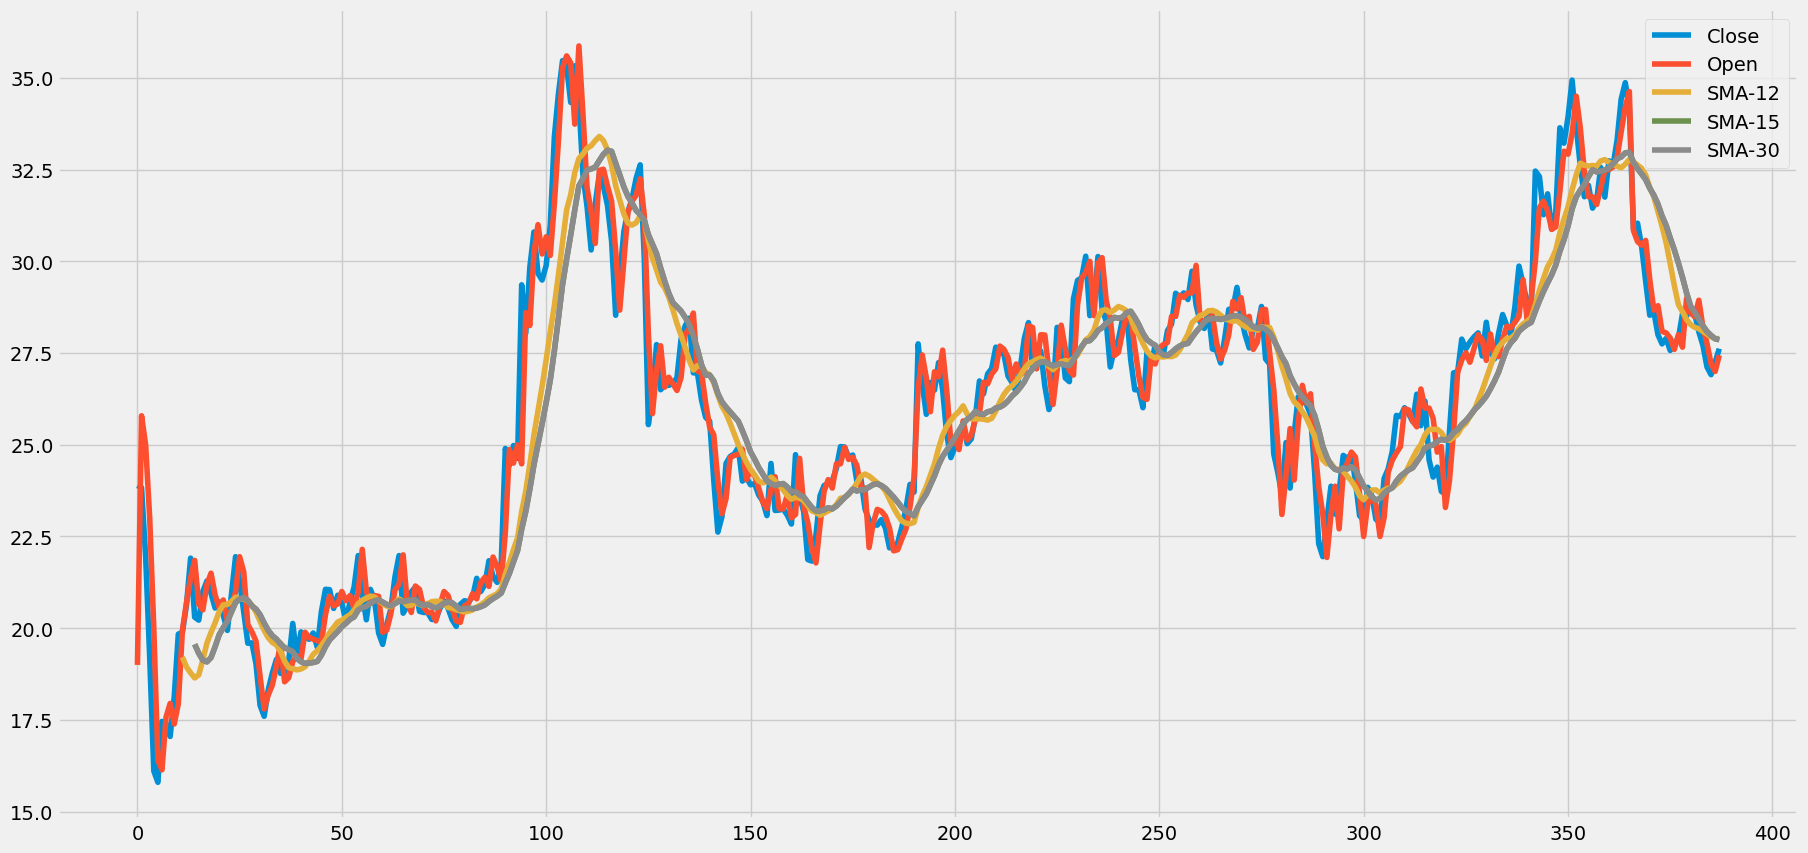

In [6]:
plt.style.use('fivethirtyeight')

df[["Date", "Close", "Open"]].plot(figsize=(20,10))
df["Close"].rolling(window=12).mean().plot(label="SMA-12", legend=True)
df["Close"].rolling(window=15).mean().plot(label="SMA-15", legend=True)
df["Close"].rolling(window=15).mean().plot(label="SMA-30", legend=True)

7. Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?

SMA для разных окон относительно данного временного ряда говорит о том, когда поступает сигнал на покупку, а когда на продажу акций.

То есть при тренде SMA вверх можно говорить о покупке акций, вниз - о продаже

Для того, чтобы ловить момент покупки и продажи, мы используем пересечение SMA для 12 и 30, 
когда они пересекаются на восходящем тренде - покупаем, нисходящий -продаём